In [2]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.graph_objs as go

In [3]:
# download gold an dollar index data
start='2000-01-20'
end='2024-07-26'
gold = yf.download('GC=F', start = start, end = end)
dxy = yf.download('DX-Y.NYB', start = start, end = end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
data = pd.merge(gold['Close'], dxy['Close'], left_index=True, right_index=True)
data.columns = ['Gold', 'DXY']
data.head()

,Gold,DXY
Date,,
2000-08-30,273.899994,112.139999
2000-08-31,278.299988,112.599998
2000-09-01,277.000000,111.419998
2000-09-05,275.799988,112.410004
2000-09-06,274.200012,114.120003


In [10]:
presidents = pd.DataFrame({
    'President': ['Bush', 'Obama', 'Trump', 'Biden'],
    'Start': pd.to_datetime(['2001-01-20', '2009-01-20', '2017-01-20', '2021-01-20']),
    'End': pd.to_datetime(['2009-01-19', '2017-01-19', '2021-01-19', '2024-07-26']),
    'FillColor': ['#BAFFC9', '#BAE1FF', '#FFFFBA', '#FFD8B1']
})

In [11]:
# Función para obtener el valor más cercano a una fecha
def get_closest_value(date, data_series):
    return data_series.iloc[data_series.index.get_indexer([date], method='nearest')[0]]

# Añadir valores de inicio y fin para DXY y Gold
for index, row in presidents.iterrows():
    presidents.loc[index, 'DXY_Start'] = get_closest_value(row['Start'], data['DXY'])
    presidents.loc[index, 'DXY_End'] = get_closest_value(row['End'], data['DXY'])
    presidents.loc[index, 'Gold_Start'] = get_closest_value(row['Start'], data['Gold'])
    presidents.loc[index, 'Gold_End'] = get_closest_value(row['End'], data['Gold'])

# Calcular cambios porcentuales
presidents['DXY_Change'] = (presidents['DXY_End'] - presidents['DXY_Start']) / presidents['DXY_Start'] * 100
presidents['Gold_Change'] = (presidents['Gold_End'] - presidents['Gold_Start']) / presidents['Gold_Start'] * 100

print(presidents)

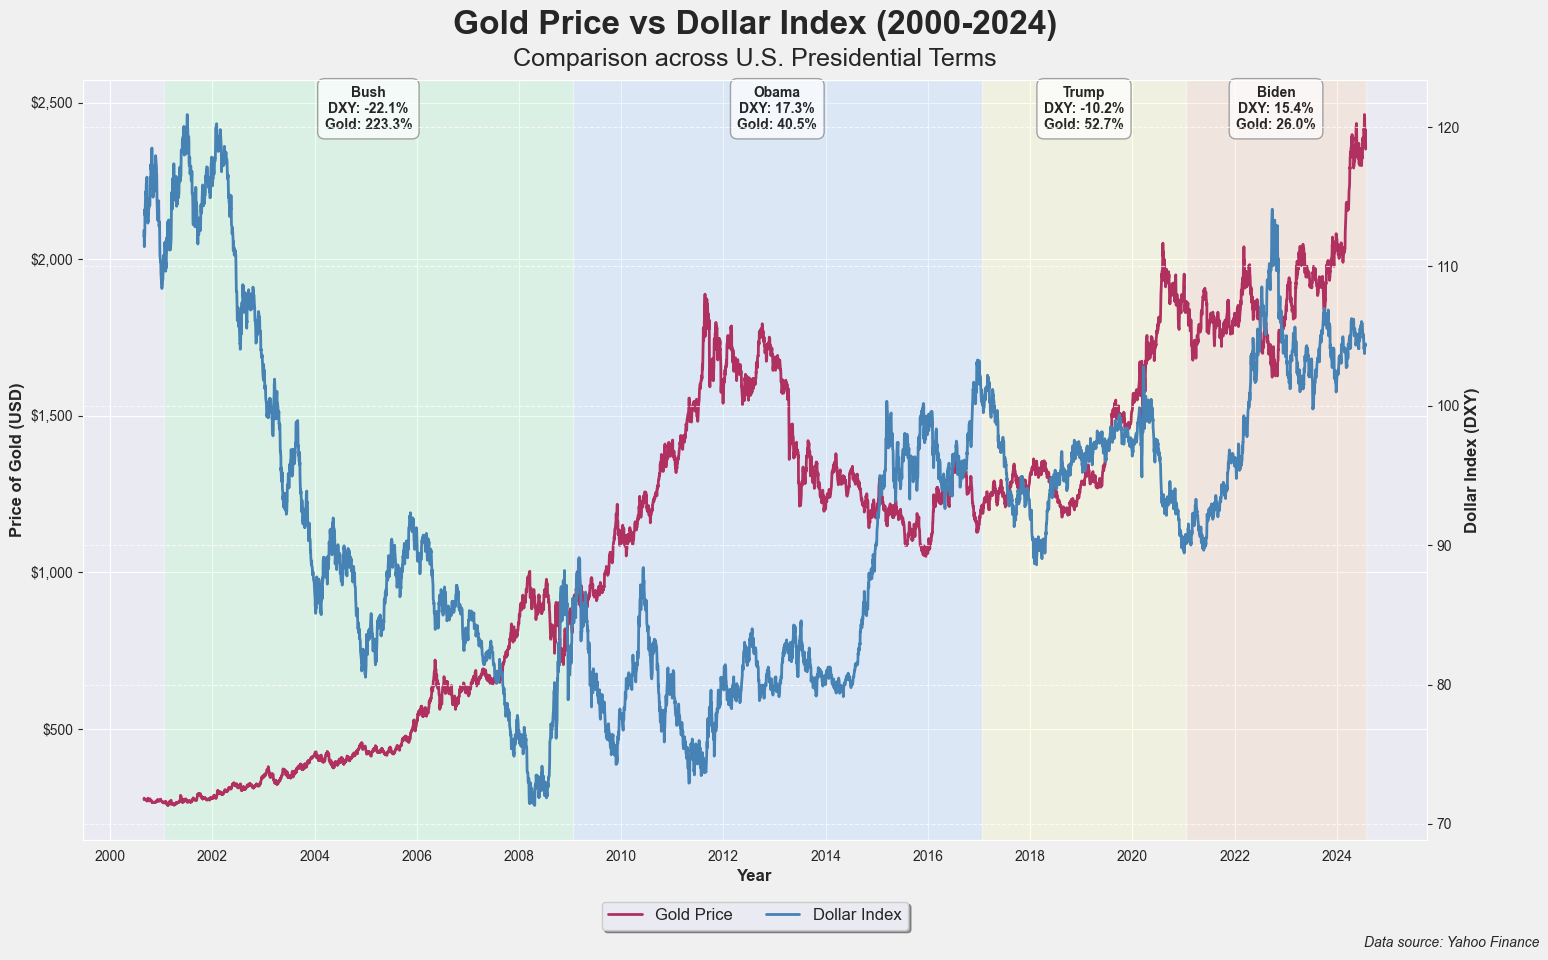

In [16]:
# Crear la gráfica con estilo mejorado
sns.set_style("darkgrid") 
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()

# Áreas de fondo para los presidentes
for _, pres in presidents.iterrows():
    ax1.axvspan(pres['Start'], pres['End'], facecolor=pres['FillColor'], alpha=0.3)

# Líneas de datos
ax1.plot(data.index, data['Gold'], color='#B03060', linewidth=2, label='Gold Price')
ax2.plot(data.index, data['DXY'], color='#4682B4', linewidth=2, label='Dollar Index')

# Configuración de ejes
ax1.set_ylabel('Price of Gold (USD)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Dollar Index (DXY)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Year', fontweight='bold', fontsize=12)

# Formato de fechas en el eje x
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(DateFormatter('%Y'))

# Formato de etiquetas en el eje y
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:.0f}'))

# Etiquetas y tema
fig.suptitle('Gold Price vs Dollar Index (2000-2024)', fontsize=24, fontweight='bold', y=0.95)
ax1.set_title('Comparison across U.S. Presidential Terms', fontsize=18, pad=10)

# Anotaciones para presidentes
max_gold = data['Gold'].max()
# Añadir anotaciones con los cambios porcentuales
for _, pres in presidents.iterrows():
    mid_date = pres['Start'] + (pres['End'] - pres['Start']) / 2
    ax1.annotate(f"{pres['President']}\nDXY: {pres['DXY_Change']:.1f}%\nGold: {pres['Gold_Change']:.1f}%",
                 xy=(mid_date, max_gold-100),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', fontweight='bold', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.7))

# Leyenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.07), 
           ncol=2, fancybox=True, shadow=True, fontsize=12)

# Ajustes finales
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.text(0.99, 0.01, 'Data source: Yahoo Finance', ha='right', va='bottom', fontsize=10, fontstyle='italic')

# Ajustar los márgenes
plt.subplots_adjust(top=0.88, bottom=0.12, left=0.08, right=0.92)

# Añadir un fondo suave
fig.patch.set_facecolor('#F0F0F0')


plt.show()